In [1]:
import os
import sys

import numpy as np
from matplotlib import pyplot as plt

from pypower import CatalogFFTPower, PowerSpectrumSmoothWindow, PowerSpectrumSmoothWindowMatrix
from mockfactory import Catalog, utils
import pycorr

import os
plt.style.use(os.path.join(os.path.abspath(''), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

## Load two point counter

In [2]:
mock_version = 'firstGen'

### Pairs counts as a function of $r_{\perp}$

In [3]:
data_dir = '/global/cfs/cdirs/desi/users/mpinon/{}MocksY1/ddcounts/'.format(mock_version)
fn_fibered = 'DD_rppi_mock{{:d}}_ELG{}_ffa_SGC_0.8_1.6_smax4.npy'.format('_LOP' if mock_version=='secondGen' else '')
fn_complete = 'DD_rppi_mock{{:d}}_ELG{}_complete_SGC_0.8_1.6_smax4.npy'.format('_LOP' if mock_version=='secondGen' else '')
nmocks_temp = 25

counter_fibered_rp = [pycorr.TwoPointCounter.load(data_dir+fn_fibered.format(i)).rebin((5, 1)) for i in range(nmocks_temp)]
counter_complete_rp = [pycorr.TwoPointCounter.load(data_dir+fn_complete.format(i)).rebin((5, 1)) for i in range(nmocks_temp)]

In [4]:
#np.sum(counter_complete_theta[0].wcounts[theta < 0.1]) / counter_complete_theta[0].wnorm

### Pairs counts as a function of $\theta$

In [18]:
mock_version = 'secondGen'
data_dir = '/global/cfs/cdirs/desi/users/mpinon/{}MocksY1/ddcounts/'.format(mock_version)
fn_fibered = 'DD_theta_mock{{:d}}_ELG{}_ffa_SGC_0.8_1.6_thetamax10.npy'.format('_LOP' if mock_version=='secondGen' else '')
fn_complete = 'DD_theta_mock{{:d}}_ELG{}_complete_SGC_0.8_1.6_thetamax10.npy'.format('_LOP' if mock_version=='secondGen' else '')
nmocks = 1

counter_fibered_theta = [pycorr.TwoPointCounter.load(os.path.join(data_dir, fn_fibered.format(i))) for i in range(nmocks)]
counter_complete_theta = [pycorr.TwoPointCounter.load(os.path.join(data_dir, fn_complete.format(i))) for i in range(nmocks)]

mock_version = 'firstGen'
data_dir = '/global/cfs/cdirs/desi/users/mpinon/{}MocksY1/ddcounts/'.format(mock_version)
fn_fibered_firstgen = 'DD_theta_mock{{:d}}_ELG{}_ffa_SGC_0.8_1.6_thetamax10.npy'.format('_LOP' if mock_version=='secondGen' else '')
fn_complete_firstgen = 'DD_theta_mock{{:d}}_ELG{}_complete_SGC_0.8_1.6_thetamax10.npy'.format('_LOP' if mock_version=='secondGen' else '')
nmocks = 1

counter_fibered_firstgen_theta = [pycorr.TwoPointCounter.load(os.path.join(data_dir, fn_fibered_firstgen.format(i))) for i in range(nmocks)]
counter_complete_firstgen_theta = [pycorr.TwoPointCounter.load(os.path.join(data_dir, fn_complete_firstgen.format(i))) for i in range(nmocks)]

## Plot $DD^{fibered}/DD^{complete}$ as a function of $r_p$

In [6]:
theta = counter_fibered_theta[0].sepavg()
rp = counter_fibered_rp[0].sepavg()

theta_firstgen = counter_fibered_firstgen_theta[0].sepavg()

In [7]:
dd_fibered_theta = np.mean(np.array([counter_fibered_theta[i].wcounts/counter_fibered_theta[i].wnorm for i in range(nmocks)]), axis=0)
dd_complete_theta = np.mean(np.array([counter_complete_theta[i].wcounts/counter_complete_theta[i].wnorm for i in range(nmocks)]), axis=0)

dd_fibered_firstgen_theta = np.mean(np.array([counter_fibered_firstgen_theta[i].wcounts/counter_fibered_firstgen_theta[i].wnorm for i in range(nmocks)]), axis=0)
dd_complete_firstgen_theta = np.mean(np.array([counter_complete_firstgen_theta[i].wcounts/counter_complete_firstgen_theta[i].wnorm for i in range(nmocks)]), axis=0)

dd_fibered_rp = np.mean(np.array([np.sum(counter_fibered_rp[i].wcounts, axis=1)/counter_fibered_rp[i].wnorm for i in range(nmocks)]), axis=0)
dd_complete_rp = np.mean(np.array([np.sum(counter_complete_rp[i].wcounts, axis=1)/counter_complete_rp[i].wnorm for i in range(nmocks)]), axis=0)

In [8]:
window_rp = dd_fibered_rp / dd_complete_rp
window_theta = dd_fibered_theta / dd_complete_theta
window_firstgen_theta = dd_fibered_firstgen_theta / dd_complete_firstgen_theta

In [9]:
from scipy.interpolate import interp1d
window_rp_interp = interp1d(rp, window_rp)

In [10]:
from cosmoprimo import fiducial
cosmo = fiducial.DESI()
d = cosmo.comoving_angular_distance(1.05)

In [11]:
rp

array([0.03216869, 0.07910633, 0.12484916, 0.17573373, 0.22533351,
       0.27562975, 0.32633926, 0.37434519, 0.42528684, 0.47545555,
       0.52583871, 0.57525983, 0.62591468, 0.67571863, 0.72538193,
       0.77517802, 0.82486497, 0.87535942, 0.92513276, 0.97512781,
       1.02519731, 1.07515535, 1.12513812, 1.17517547, 1.22511652,
       1.27520329, 1.32554918, 1.37530241, 1.42549712, 1.47545398,
       1.52497261, 1.57505983, 1.62516875, 1.67513379, 1.72502248,
       1.7749997 , 1.82493135, 1.8749    , 1.92474093, 1.97484408,
       2.02537716, 2.07517082, 2.12493936, 2.1749872 , 2.22506722,
       2.27532524, 2.3252634 , 2.37511768, 2.42482626, 2.4751149 ,
       2.52485885, 2.57513424, 2.62503373, 2.67497607, 2.72497783,
       2.77514549, 2.82505774, 2.87495371, 2.92518595, 2.9751117 ,
       3.02513723, 3.07478637, 3.12501241, 3.17511944, 3.22508889,
       3.27493528, 3.32505212, 3.37504866, 3.42512888, 3.47499946,
       3.52533534, 3.57505519, 3.62474802, 3.67516265, 3.72497

In [12]:
rp_eq = theta*np.pi/180*d
mask = rp_eq < np.max(rp)

In [13]:
2.5/d*180/np.pi

0.060324472787550154

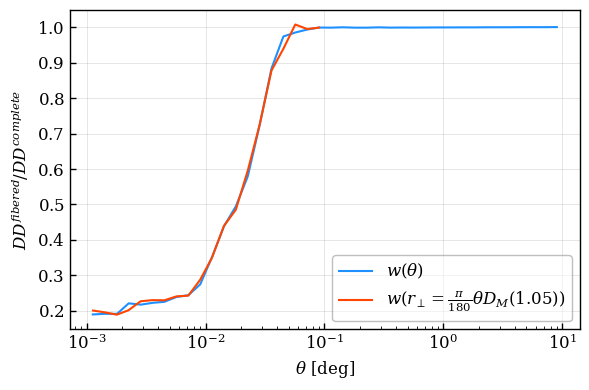

In [28]:
#plt.semilogx(theta, window_theta, label='second gen. (normalized)')
plt.semilogx(theta_firstgen, window_firstgen_theta, label=r'$w(\theta)$')
plt.semilogx(theta[mask], window_rp_interp(rp_eq[mask]), label=r'$w(r_{\perp} = \frac{\pi}{180} \theta D_{M}(1.05))$')
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$DD^{fibered}/DD^{complete}$')
plt.legend()
plt.savefig(os.path.join(plots_dir, 'dd_fibered_to_dd_complete_theta_rp_firstgen.png'), dpi=200)
plt.show()

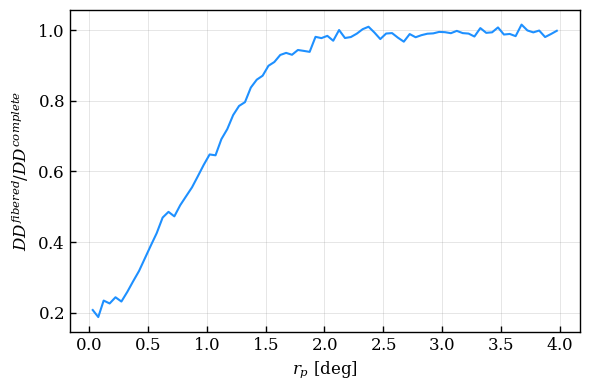

In [15]:
plt.plot(rp, window_rp)
plt.xlabel(r'$r_p$ [deg]')
plt.ylabel(r'$DD^{fibered}/DD^{complete}$')
plt.savefig(os.path.join(plots_dir, 'dd_fibered_to_dd_complete_rp_firstgen.png'), dpi=200)
plt.show()

## Plot $RR^{fibered}/RR^{complete}$ as a function of $r_p$

In [41]:
nmocks = 1

mock_version = 'secondGen'
data_dir = '/global/cfs/cdirs/desi/users/mpinon/{}MocksY1/altmtl0/ddcounts/'.format(mock_version)
fn_fibered = 'RR_theta_mock0_ELG{}_ffa_SGC_0.8_1.6_thetamax10.npy'.format('_LOPnotqso' if mock_version=='secondGen' else '')
fn_complete = 'RR_theta_mock0_ELG{}_complete_SGC_0.8_1.6_thetamax10.npy'.format('_LOPnotqso' if mock_version=='secondGen' else '')

counter_rr_fibered_theta = pycorr.TwoPointCounter.load(os.path.join(data_dir, fn_fibered))
counter_rr_complete_theta = pycorr.TwoPointCounter.load(os.path.join(data_dir, fn_complete))

mock_version = 'firstGen'
data_dir = '/global/cfs/cdirs/desi/users/mpinon/{}MocksY1/ddcounts/'.format(mock_version)
fn_fibered = 'RR_theta_mock0_ELG{}_ffa_SGC_0.8_1.6_thetamax10.npy'.format('_LOP' if mock_version=='secondGen' else '')
fn_complete = 'RR_theta_mock0_ELG{}_complete_SGC_0.8_1.6_thetamax10.npy'.format('_LOP' if mock_version=='secondGen' else '')

counter_rr_fibered_firstgen_theta = pycorr.TwoPointCounter.load(os.path.join(data_dir, fn_fibered))
counter_rr_complete_firstgen_theta = pycorr.TwoPointCounter.load(os.path.join(data_dir, fn_complete))

In [42]:
window_theta = counter_rr_fibered_theta.wcounts / counter_rr_complete_theta.wcounts * counter_rr_complete_theta.wnorm / counter_rr_fibered_theta.wnorm
window_firstgen_theta = counter_rr_fibered_firstgen_theta.wcounts / counter_rr_complete_firstgen_theta.wcounts * counter_rr_complete_firstgen_theta.wnorm / counter_rr_fibered_firstgen_theta.wnorm

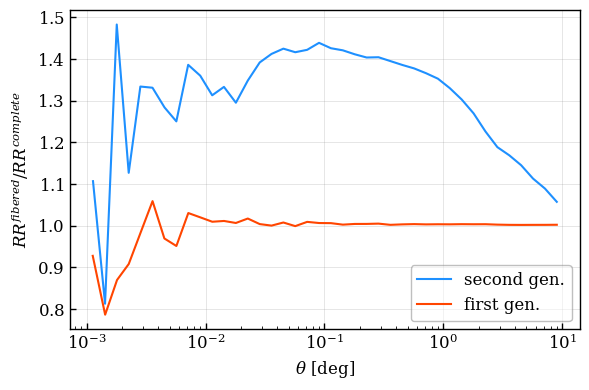

In [43]:
plt.semilogx(theta, window_theta, label='second gen.')
plt.semilogx(theta_firstgen, window_firstgen_theta, label='first gen.')
#plt.semilogx(theta[mask], window_rp_interp(rp_eq[mask]))
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$RR^{fibered}/RR^{complete}$')
plt.legend()
plt.savefig(os.path.join(plots_dir, 'rr_fibered_to_rr_complete_theta_{}.png'.format(mock_version)), dpi=200)
plt.show()

In [44]:
counter_rr_complete_theta.size1

360110

In [45]:
counter_rr_complete_firstgen_theta.size1

312585

In [46]:
window_theta = dd_fibered_theta / counter_rr_fibered_theta.wcounts / (dd_complete_theta / counter_rr_complete_theta.wcounts) / counter_rr_complete_theta.wnorm * counter_rr_fibered_theta.wnorm
window_firstgen_theta = dd_fibered_firstgen_theta / counter_rr_fibered_firstgen_theta.wcounts / (dd_complete_firstgen_theta / counter_rr_complete_firstgen_theta.wcounts) / counter_rr_complete_firstgen_theta.wnorm * counter_rr_fibered_firstgen_theta.wnorm

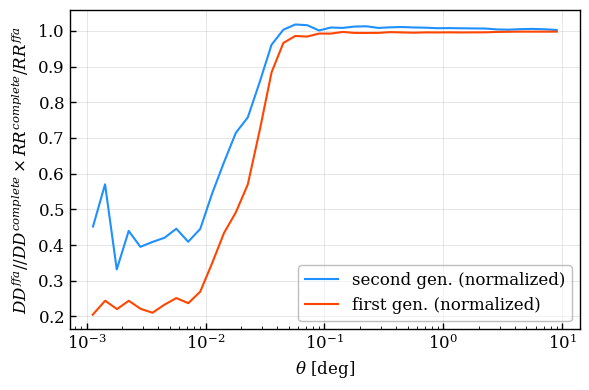

In [47]:
plt.semilogx(theta, window_theta, label='second gen. (normalized)')
plt.semilogx(theta_firstgen, window_firstgen_theta, label='first gen. (normalized)')
#plt.semilogx(theta[mask], window_rp_interp(rp_eq[mask]))
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$DD^{ffa}//DD^{complete} \times RR^{complete}/RR^{ffa}$')
plt.legend()
plt.savefig(os.path.join(plots_dir, 'dd_rr_fibered_complete_ratio_theta_firstgen_secondgen.png'), dpi=200)
plt.show()

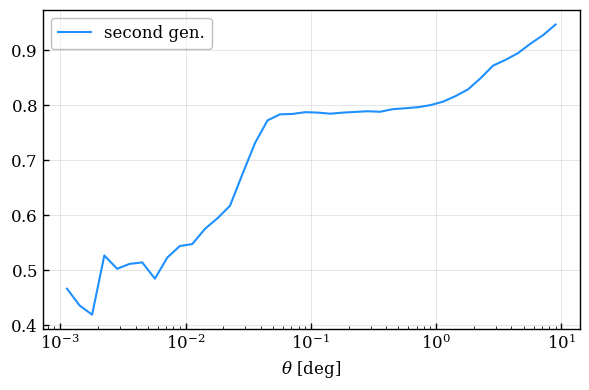

In [23]:
plt.semilogx(theta, counter_rr_complete_theta.wcounts / counter_rr_complete_firstgen_theta.wcounts / counter_rr_complete_theta.wnorm * counter_rr_complete_firstgen_theta.wnorm, label='second gen.')
#plt.semilogx(theta[mask], window_rp_interp(rp_eq[mask]))
plt.xlabel(r'$\theta$ [deg]')
#plt.ylabel(r'$RR^{complete}/RR^{complete}$')
plt.legend()
plt.show()

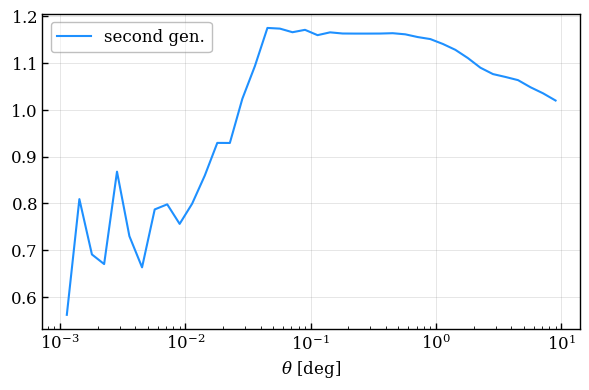

In [24]:
plt.semilogx(theta, counter_rr_fibered_theta.wcounts / counter_rr_fibered_firstgen_theta.wcounts / counter_rr_fibered_theta.wnorm * counter_rr_fibered_firstgen_theta.wnorm, label='second gen.')
#plt.semilogx(theta[mask], window_rp_interp(rp_eq[mask]))
plt.xlabel(r'$\theta$ [deg]')
#plt.ylabel(r'$RR^{complete}/RR^{complete}$')
plt.legend()
plt.show()